In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import os
from matplotlib import pyplot
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

%matplotlib inline
%config InlineBackend.figure_format='retina'

# **รวบรวมข้อมูลที่คิดว่ามีผลต่อการเกิด PM2.5**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Bewsure/DataLSTM/main/Data17-20_noclean.csv')
df

,date,pressure,wind_speed,humidity,temperature,traffic,PM10,PM2.5
0,2017-11-01,101013.3203,2.700052,67.445312,27.344531,NaN,57,43.0
1,2017-11-02,100784.9225,2.324088,63.472868,28.941860,NaN,55,43.0
2,2017-11-03,100780.4428,2.484124,57.516605,29.244280,NaN,65,40.0
3,2017-11-04,100807.7431,2.696210,50.972222,28.576736,NaN,54,51.0
4,2017-11-05,100865.8363,4.023996,60.676157,25.747331,NaN,64,33.0
...,...,...,...,...,...,...,...,...
1152,2020-12-27,101151.4693,1.000000,73.000000,29.335680,2.882230,42,35.0
1153,2020-12-28,101016.0137,0.000000,80.000000,28.335600,3.178819,55,25.0
1154,2020-12-29,101016.0137,0.000000,74.000000,29.780160,3.095470,51,31.0
1155,2020-12-30,101117.6054,5.000000,65.000000,29.224560,2.843902,38,29.0


In [ ]:
df.shape

(1157, 8)

In [ ]:
df.dtypes

date            object
pressure       float64
wind_speed     float64
humidity       float64
temperature    float64
traffic        float64
PM10            object
PM2.5          float64
dtype: object

# **แปลงข้อมูล เป็น datetime float int**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')

In [ ]:
dff = df

In [ ]:
dff.set_index('date', inplace=True)

In [ ]:
dff.describe()

,pressure,wind_speed,humidity,temperature,traffic,PM10,PM2.5
count,1149.000000,1149.000000,1149.000000,1149.000000,1094.000000,1155.000000,1154.000000
mean,100921.123584,2.546647,73.174283,29.293184,3.817695,41.841126,27.293761
std,318.570742,2.292052,8.662463,1.707531,0.554140,15.818514,13.321152
min,98205.310000,0.000000,44.501859,19.916236,1.883462,14.000000,8.000000
25%,100711.238600,1.000000,67.800000,28.517708,3.482941,29.000000,18.000000
50%,100914.422000,1.900000,74.837037,29.460800,3.923484,39.000000,23.000000
75%,101151.469300,3.000000,78.770428,30.280200,4.211679,52.000000,33.000000
max,101862.611200,12.300000,95.000000,33.780480,6.300000,94.000000,92.000000


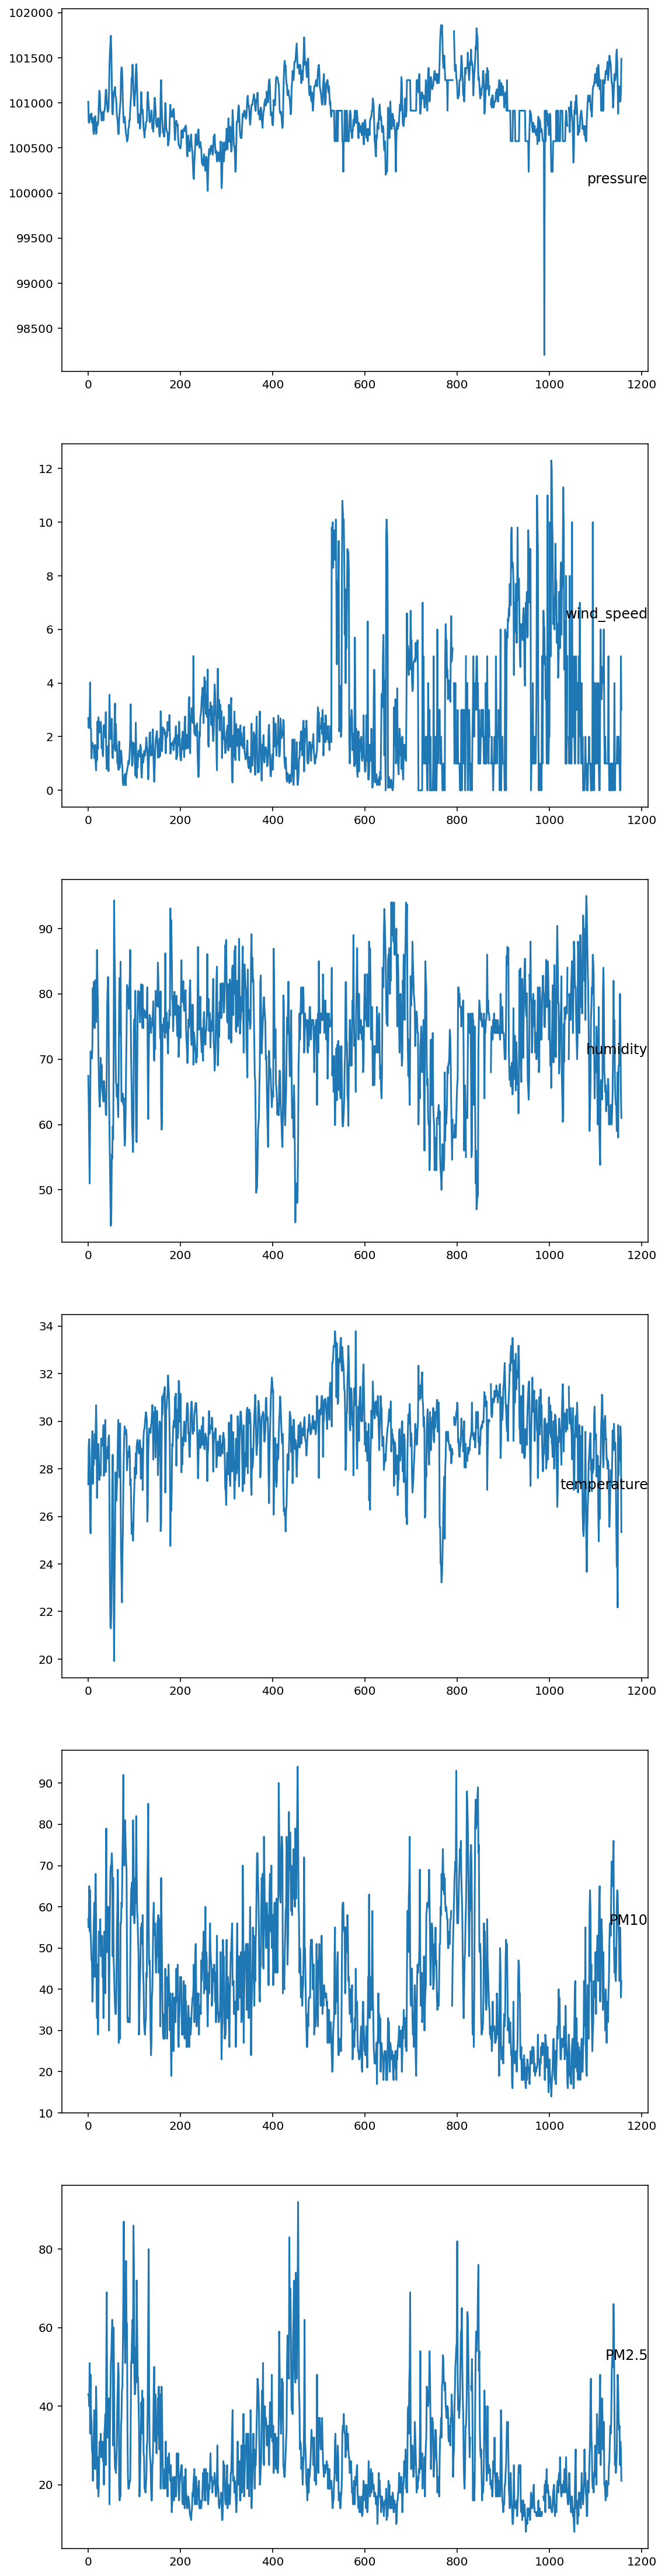

In [ ]:
# specify columns to plot
columns = [0, 1, 2, 3, 5, 6]
i = 1
values = dff.values
# define figure object and size
plt.figure(figsize=(9,40))
# plot each column with a for loop
for variable in columns:
     plt.subplot(len(columns), 1, i)
     plt.plot(values[:, variable])
     plt.title(dff.columns[variable], y=0.5, loc='right')
     i += 1
plt.show()

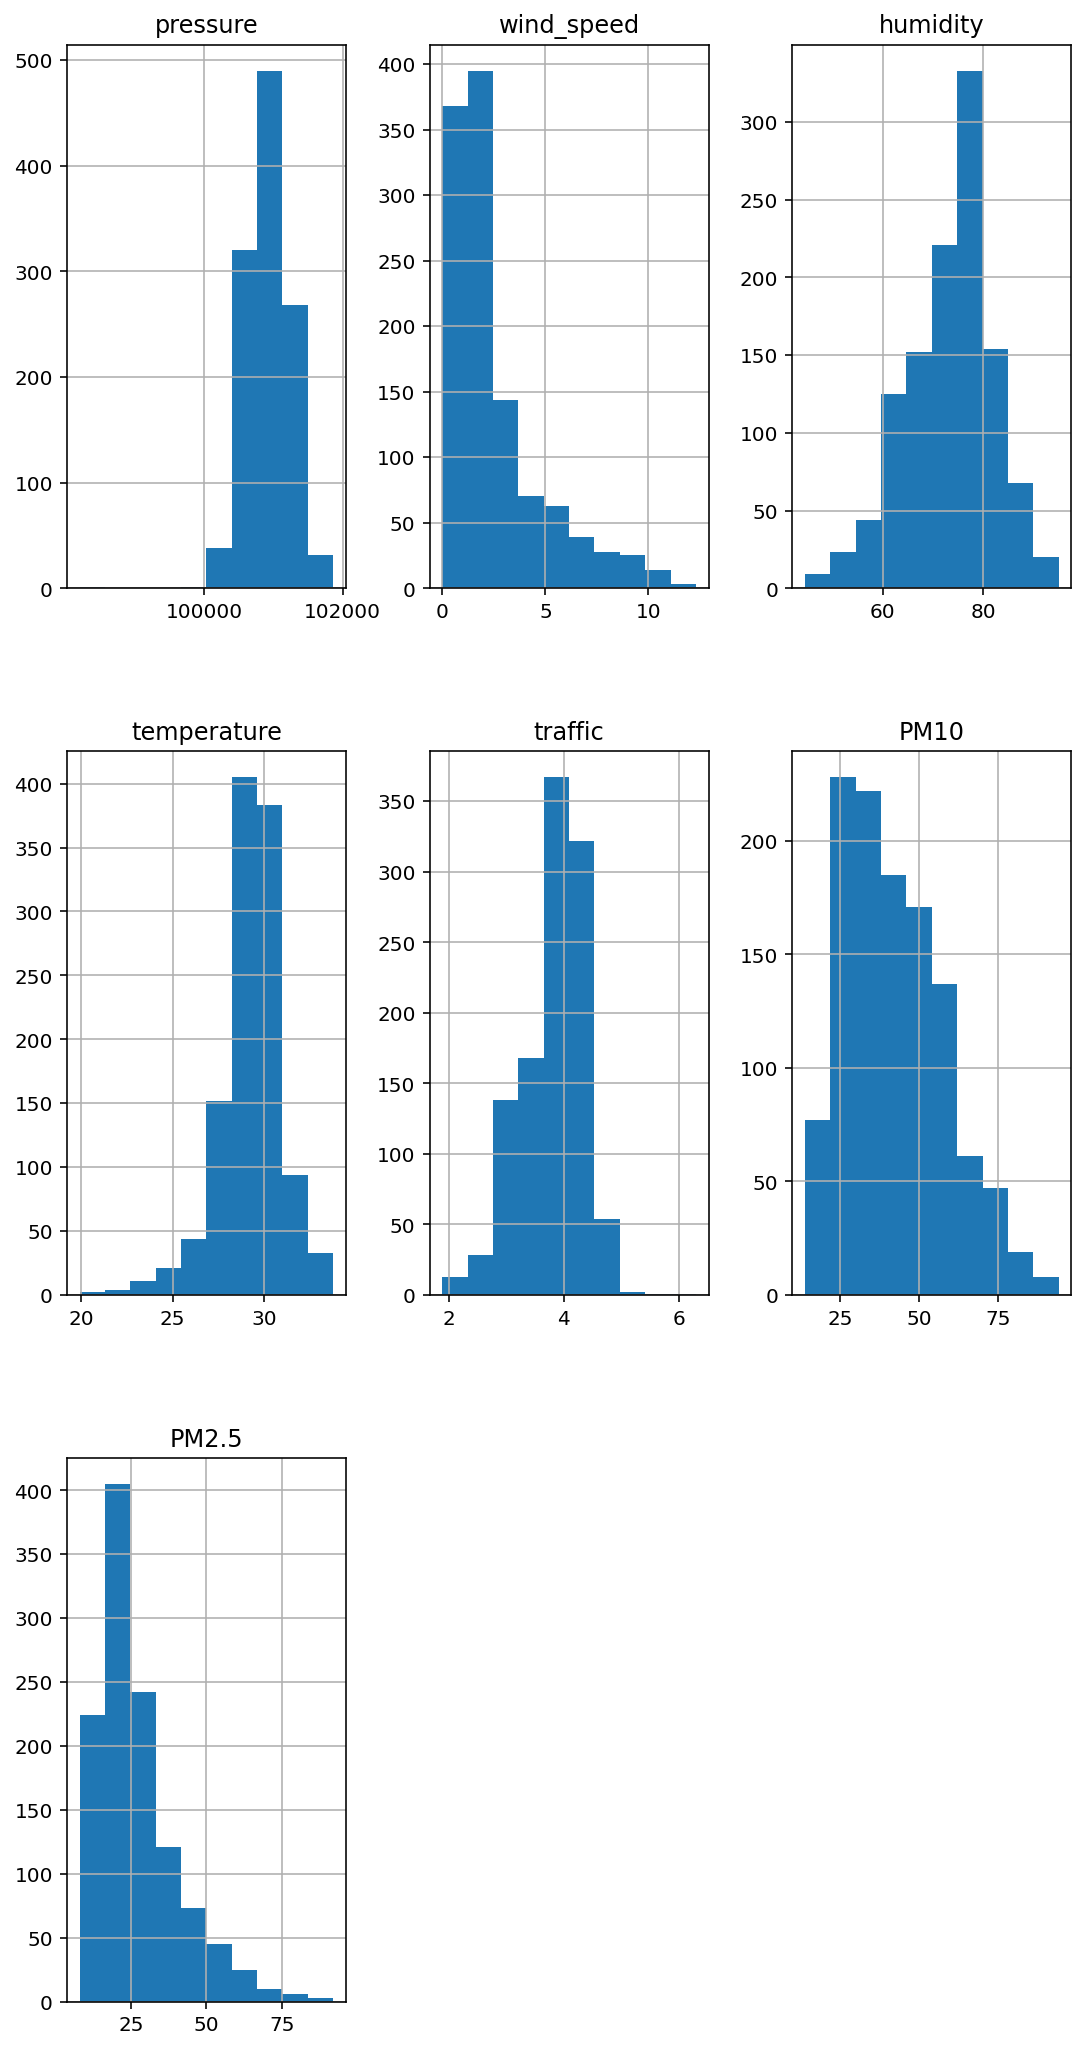

In [ ]:
# histograms of the variables
dff.hist(figsize=(9,18))
plt.show()

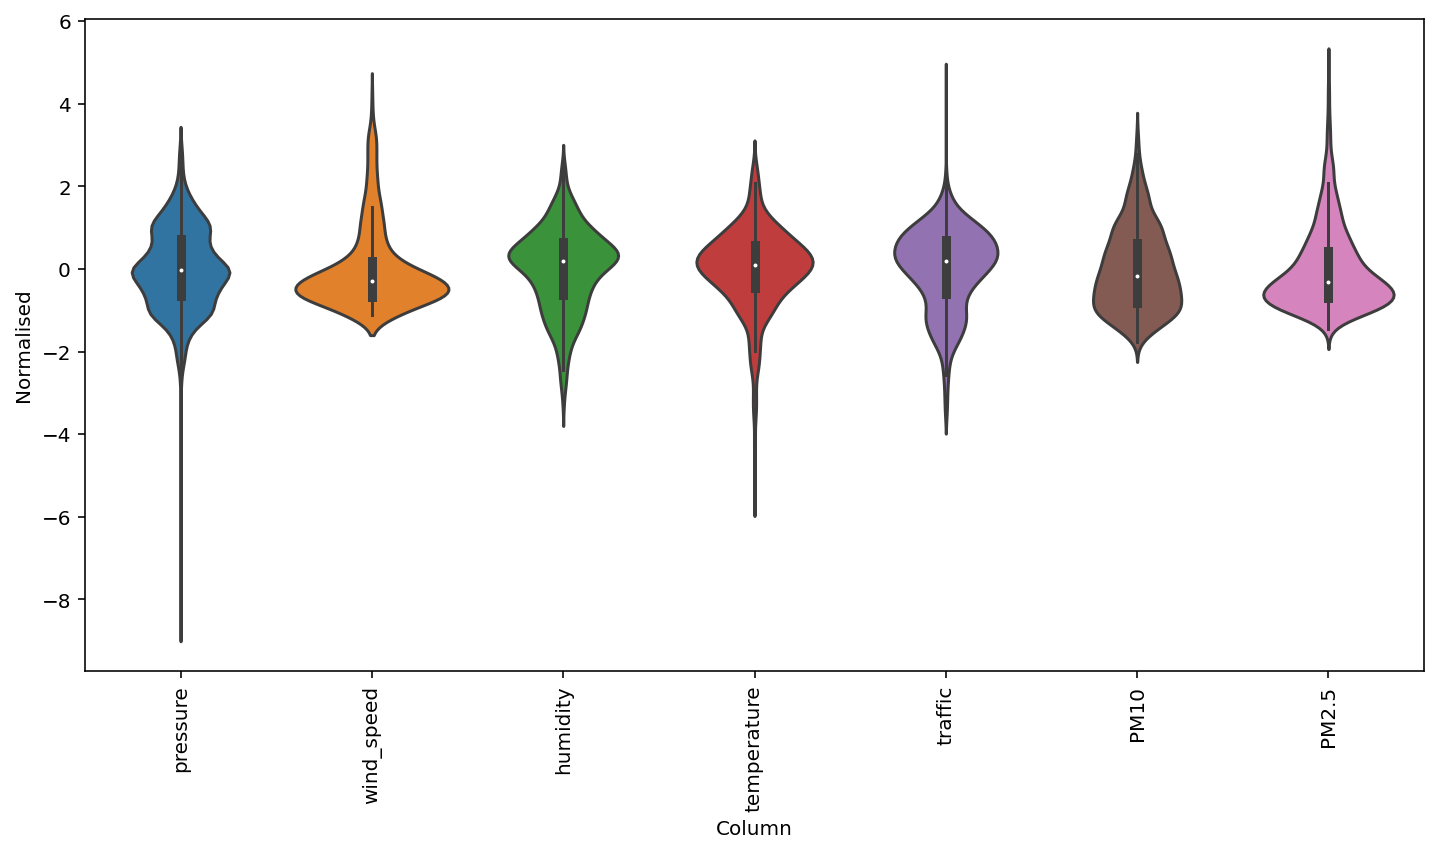

In [ ]:
# calculate dataset mean and standard deviation
mean = dff.mean()
std = dff.std()
# normalise dataset with previously calculated values
df_std = (dff - mean) / std
# create violin plot
df_std = df_std.melt(var_name='Column', value_name='Normalised')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalised', data=df_std)
_ = ax.set_xticklabels(dff.keys(), rotation=90)

In [ ]:
df.columns

Index(['pressure', 'wind_speed', 'humidity', 'temperature', 'traffic', 'PM10',
       'PM2.5'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


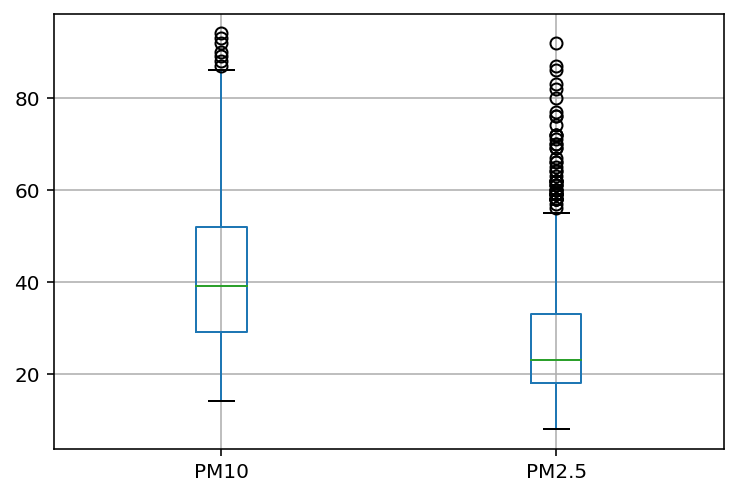

In [ ]:
boxplot = df.boxplot(column=['PM10','PM2.5'])

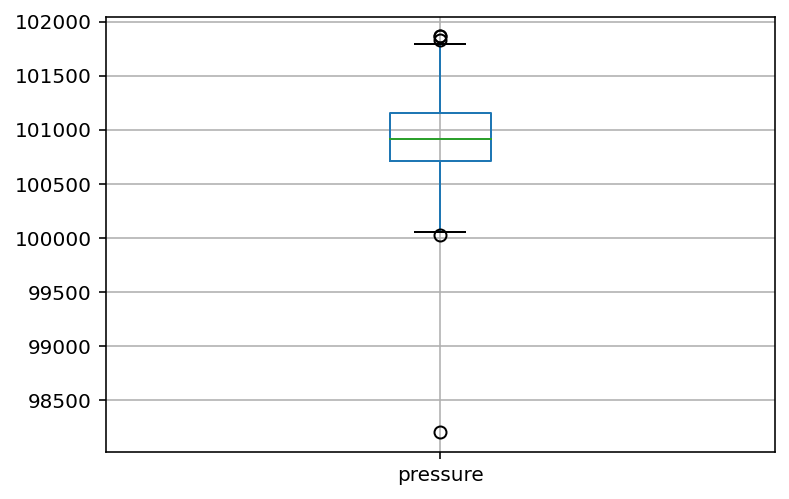

In [ ]:
boxplot = df.boxplot(column=['pressure'])

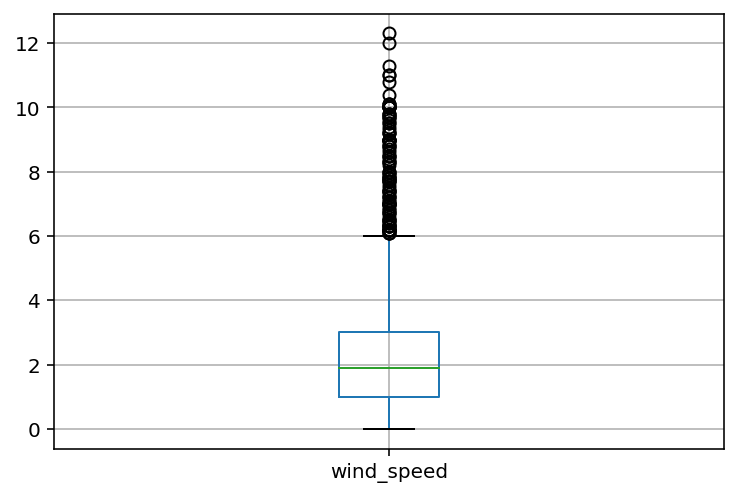

In [ ]:
boxplot = df.boxplot(column=['wind_speed'])

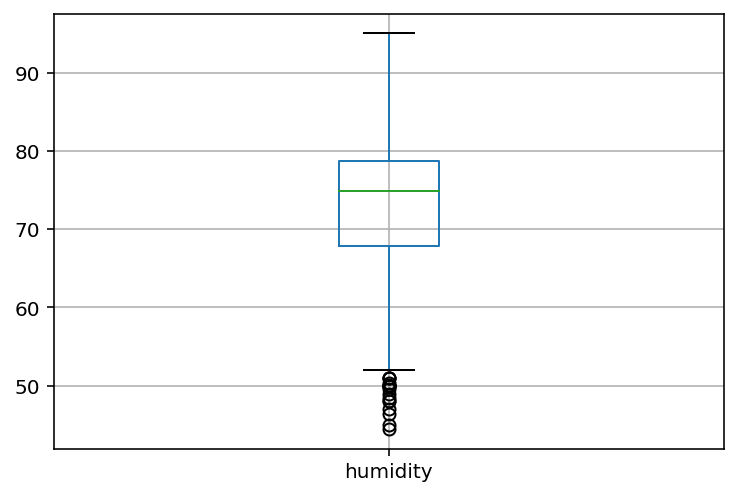

In [ ]:
boxplot = df.boxplot(column=['humidity'])

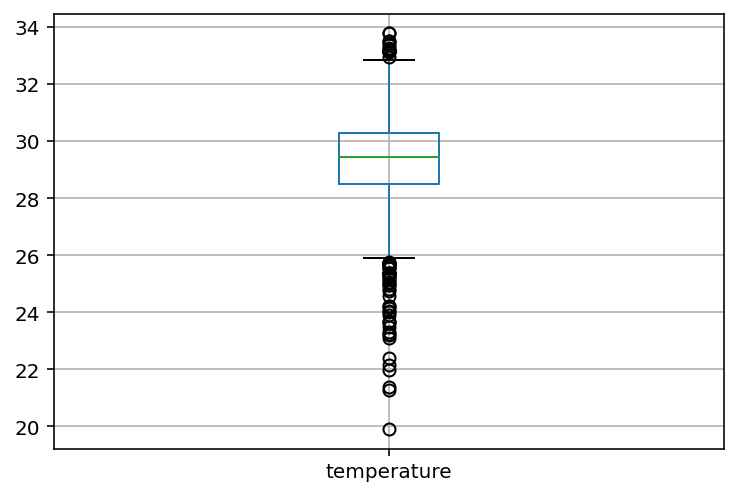

In [ ]:
boxplot = df.boxplot(column=['temperature'])

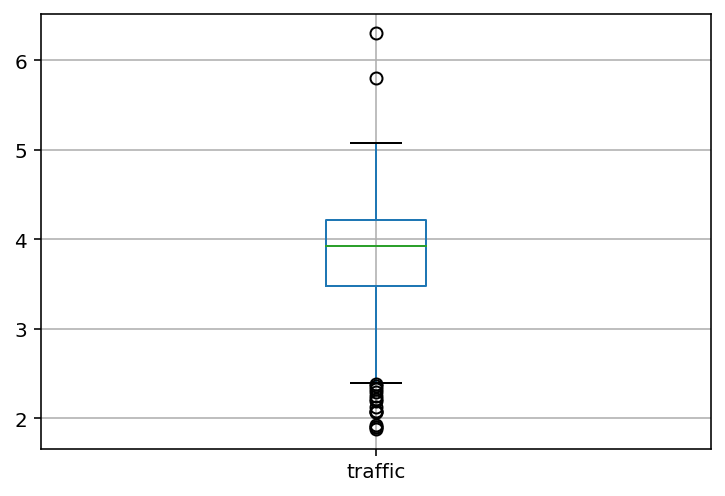

In [ ]:
boxplot = df.boxplot(column=['traffic'])

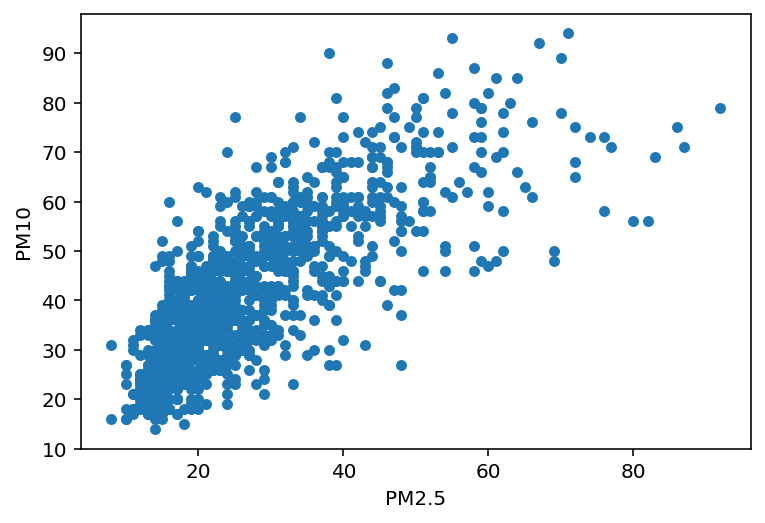

In [ ]:
df.plot.scatter(x='PM2.5', y='PM10')

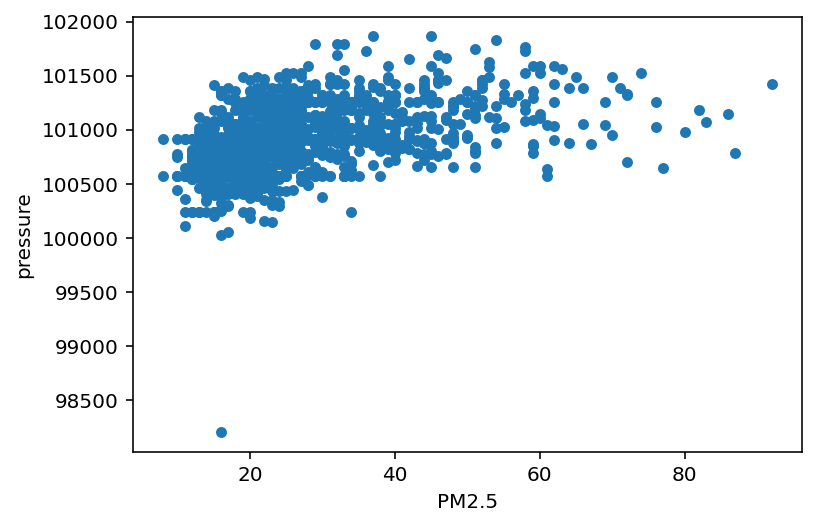

In [ ]:
df.plot.scatter(x='PM2.5', y='pressure')

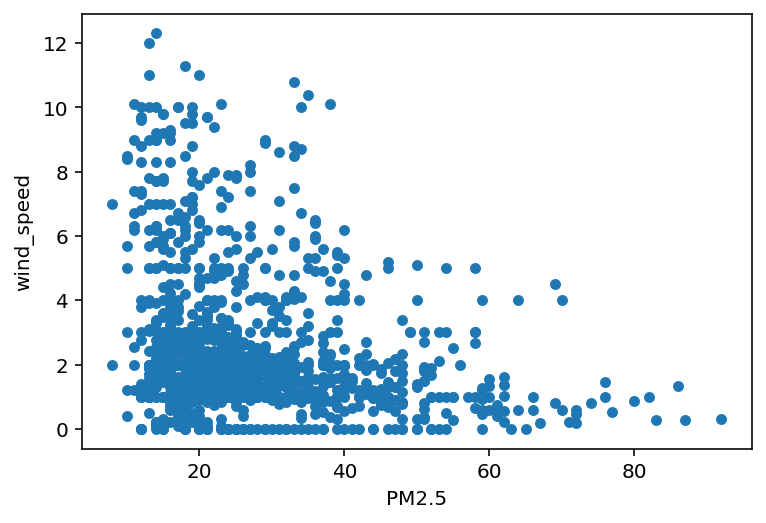

In [ ]:
df.plot.scatter(x='PM2.5', y='wind_speed')

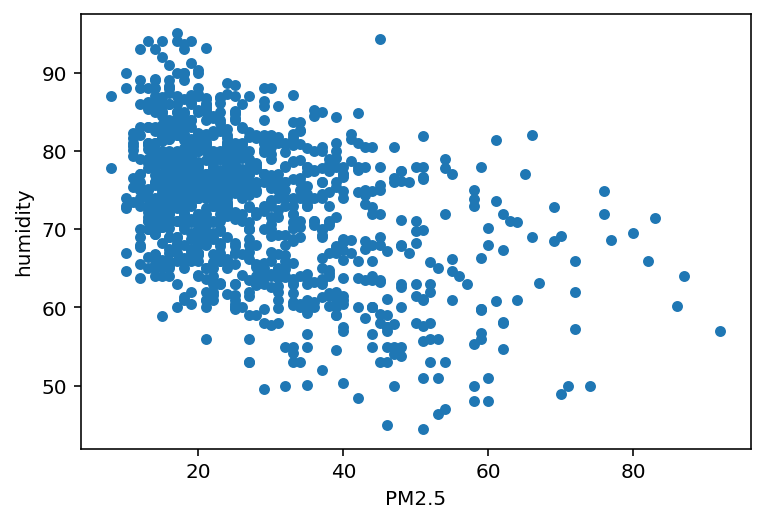

In [ ]:
df.plot.scatter(x='PM2.5', y='humidity')

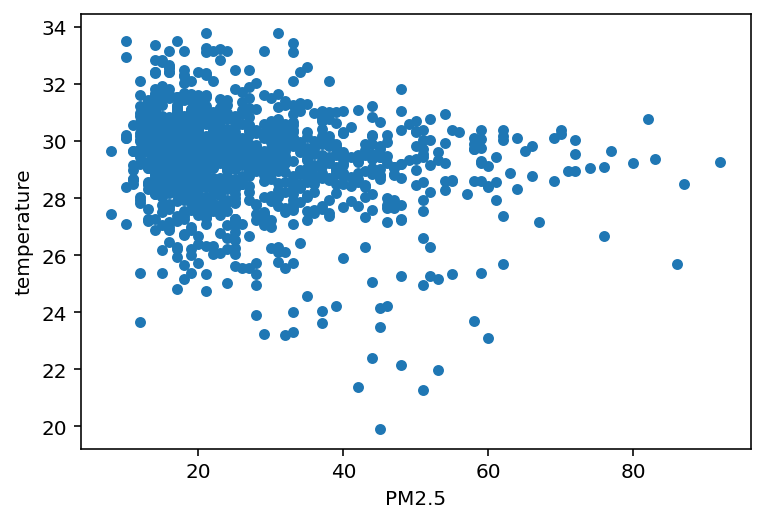

In [ ]:
df.plot.scatter(x='PM2.5', y='temperature')

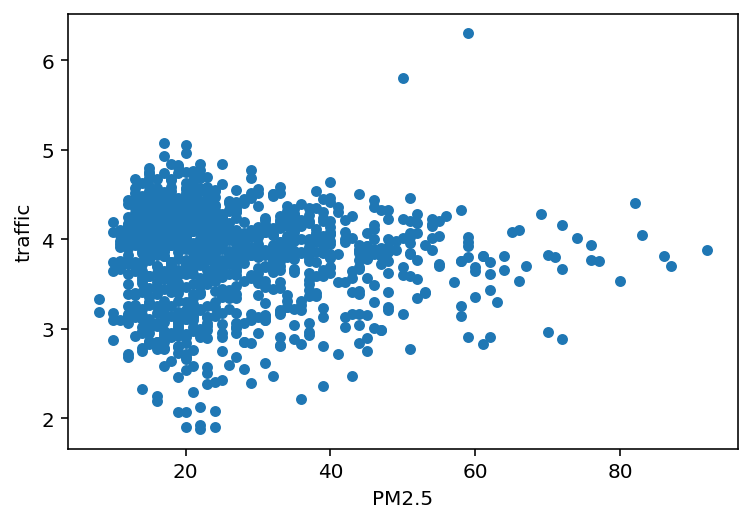

In [ ]:
df.plot.scatter(x='PM2.5', y='traffic')

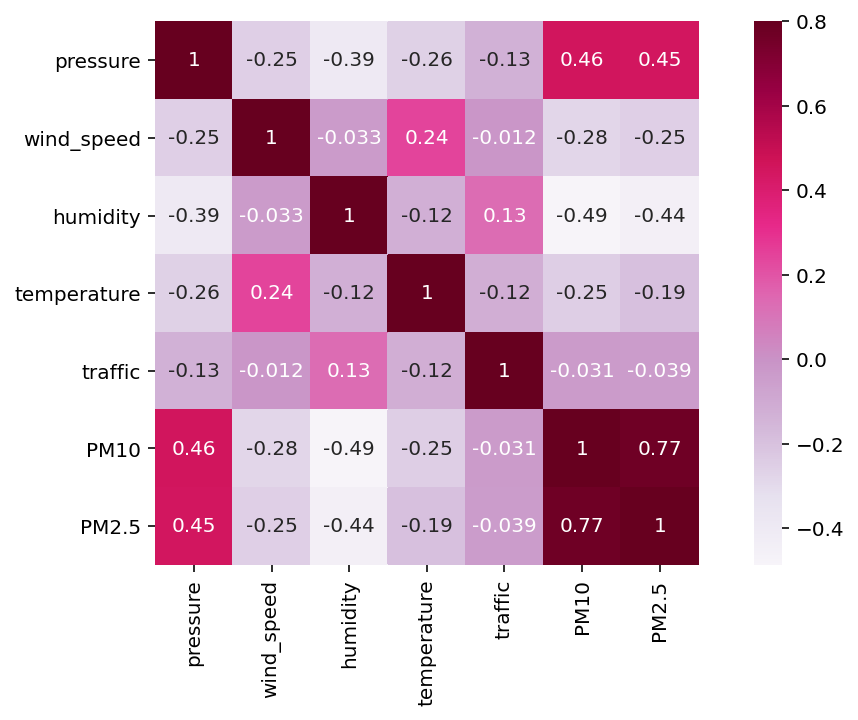

In [ ]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap="PuRd", annot = True)

เนื่องจากค่าความสัมพันธ์ของ Traffic กับ PM2.5 มีค่าน้อย ดังนั้นเราจึงตัด Feature traffic ออก

In [ ]:
df = df.drop(columns=['traffic'])

# **Clean Data**

# จัดการค่า Outlier

In [ ]:
def plot_boxplot(df_r,ft):
	df_r.boxplot(column=[ft])
	plt.grid(False)
	plt.show()


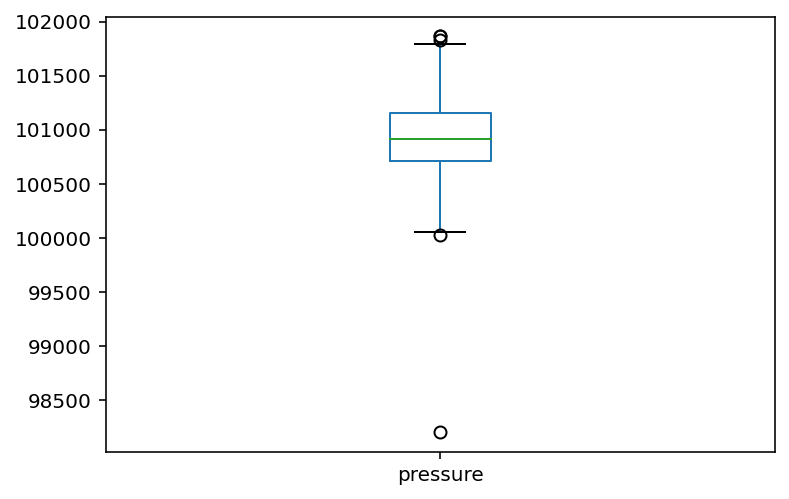

In [ ]:
plot_boxplot(df, 'pressure')

In [ ]:
# if you have to perform only for single column
df['pressure'] = np.where(df['pressure']<100000, np.nan, df['pressure'])


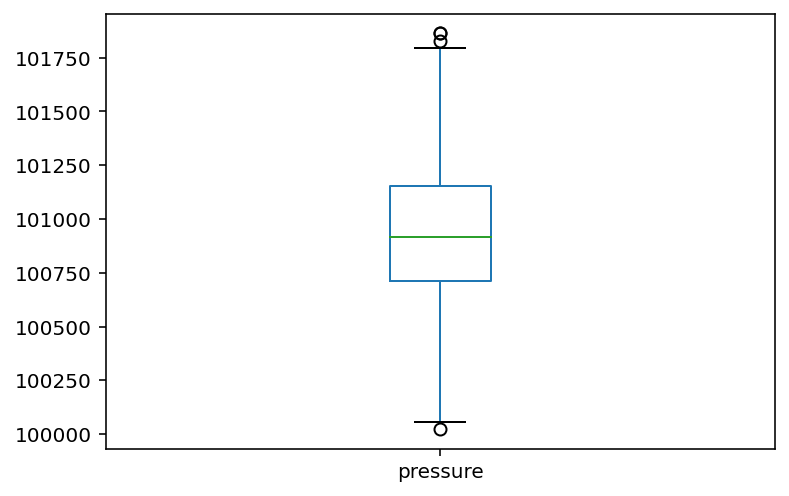

In [ ]:
plot_boxplot(df, 'pressure')

# จัดการค่า NaN

In [ ]:
df.isnull().sum().sum()

38

ตรวจสอบ NaN แต่ละ Column

In [ ]:
df['pressure'].isnull().sum()

9

In [ ]:
df['wind_speed'].isnull().sum()

8

In [ ]:
df['humidity'].isnull().sum()

8

In [ ]:
df['temperature'].isnull().sum()

8

In [ ]:
df['PM10'].isnull().sum()

2

In [ ]:
df['PM2.5'].isnull().sum()

3

# แทนที่ค่าที่หายไปด้วย Interpolate

In [ ]:
df = pd.DataFrame(df.interpolate(method="time"))
df.head()

,pressure,wind_speed,humidity,temperature,PM10,PM2.5
date,,,,,,
2017-11-01,101013.3203,2.700052,67.445312,27.344531,57.0,43.0
2017-11-02,100784.9225,2.324088,63.472868,28.941860,55.0,43.0
2017-11-03,100780.4428,2.484124,57.516605,29.244280,65.0,40.0
2017-11-04,100807.7431,2.696210,50.972222,28.576736,54.0,51.0
2017-11-05,100865.8363,4.023996,60.676157,25.747331,64.0,33.0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,pressure,wind_speed,humidity,temperature,PM10,PM2.5
count,1157.00000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,100925.32121,2.553498,73.128739,29.296215,41.836214,27.282195
std,309.02098,2.288107,8.676877,1.704275,15.809219,13.317782
min,100024.23610,0.000000,44.501859,19.916236,14.000000,8.000000
25%,100711.23860,1.000000,67.732639,28.517708,29.000000,18.000000
50%,100914.42200,1.900000,74.725738,29.462308,39.000000,23.000000
75%,101151.46930,3.002022,78.752988,30.280200,52.000000,33.000000
max,101862.61120,12.300000,95.000000,33.780480,94.000000,92.000000
